1-2. Загрузка данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [18]:
file_path = 'data_example.csv'
data = pd.read_csv(file_path,
                   sep=",",
                   header=[0,1,2,3],
                   skiprows=1,
                   na_values=['Missing','nan','Offln'],
                   encoding_errors='ignore'
                  )
data

,Name,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
,Units,Unnamed: 1_level_1,degc,degc,degc,Unnamed: 5_level_1,degc,degc,Unnamed: 8_level_1,degc,...,Unnamed: 86_level_1,Unnamed: 87_level_1,Unnamed: 88_level_1,Bar,%,%,%,Bar,degc,Bar
,Digital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,Sample Rate,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,...,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,07:32:00 06/04/2021,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77


3. Очистка заголовков

In [19]:
data.columns[:4]

MultiIndex([(                                 'Name', ...),
            ('10CT G PBP -1/+1:   --- EKC состояние', ...),
            (      '10CT G PBP -1/+1:   u09 S5 Темп', ...),
            (    '11CT G OVZ +5/+8:   u69 Sair Темп', ...)],
           )

In [20]:
data.columns = data.columns.droplevel([1,2,3])
data.columns[:4]


Index(['Name', '10CT G PBP -1/+1:   --- EKC состояние',
       '10CT G PBP -1/+1:   u09 S5 Темп', '11CT G OVZ +5/+8:   u69 Sair Темп'],
      dtype='object')

In [21]:
data = data.rename(columns={'Name':'time'})
data.head(5)

,time,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.6,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.6,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.6,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.6,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.6,50.0,0.0,0.0,10.23,-6.00,14.77


4. Информация о датасете

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26151 entries, 0 to 26150
Data columns (total 96 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   time                                     26151 non-null  object 
 1   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  float64
 2   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64
 3   11CT G OVZ +5/+8:   u69 Sair Темп        26143 non-null  float64
 4   11CT G OVZ +5/+8:   u09 S5 Темп          26143 non-null  float64
 5   11CT G OVZ +5/+8:   --- EKC состояние    26143 non-null  float64
 6   12CT G GSR +2/+4:   u09 S5 Темп          26143 non-null  float64
 7   12CT G GSR +2/+4:   u69 Sair Темп        26143 non-null  float64
 8   12CT G GSR +2/+4:   --- EKC состояние    26143 non-null  float64
 9   13CT G PBP -1/+1:   u69 Sair Темп        26143 non-null  float64
 10  13CT G PBP -1/+1:   --- EKC состояние    26143

5. Работа с индексом времени



In [23]:
data['time'] = pd.to_datetime(data['time'], format=' %H:%M:%S %d/%m/%Y')
data.index = data.pop('time')
data = data.sort_index()
data

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,0.0,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
2021-03-01 00:02:00,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,11.0,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2021-03-01 00:04:00,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,11.0,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
2021-03-01 00:06:00,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,11.0,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
2021-03-01 00:08:00,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,11.0,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:32:00,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,11.0,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77
2021-04-06 07:34:00,11.0,-16.28,7.22,-1.39,0.0,1.00,3.78,11.0,2.28,0.0,...,1.0,1.0,3.0,2.97,29.0,0.0,0.0,11.10,5.78,14.77
2021-04-06 07:36:00,11.0,-1.39,5.78,-4.89,11.0,-3.50,3.00,0.0,1.39,0.0,...,3.0,1.0,3.0,2.97,38.0,0.0,0.0,11.23,5.78,14.77


6. Пропущенные значения

10CT G PBP -1/+1:   --- EKC состояние    6
10CT G PBP -1/+1:   u09 S5 Темп          6
11CT G OVZ +5/+8:   u69 Sair Темп        8
11CT G OVZ +5/+8:   u09 S5 Темп          8
11CT G OVZ +5/+8:   --- EKC состояние    8
                                        ..
111CT AG:   Cond Requested Cap           6
111CT AG:   Cond Running Cap             6
111CT AG:   Cond Ctrl Pressure           6
111CT AG:   Sc3 Датч нар воздуха         0
111CT AG:   Cond Reference               6
Length: 95, dtype: int64


<Axes: >

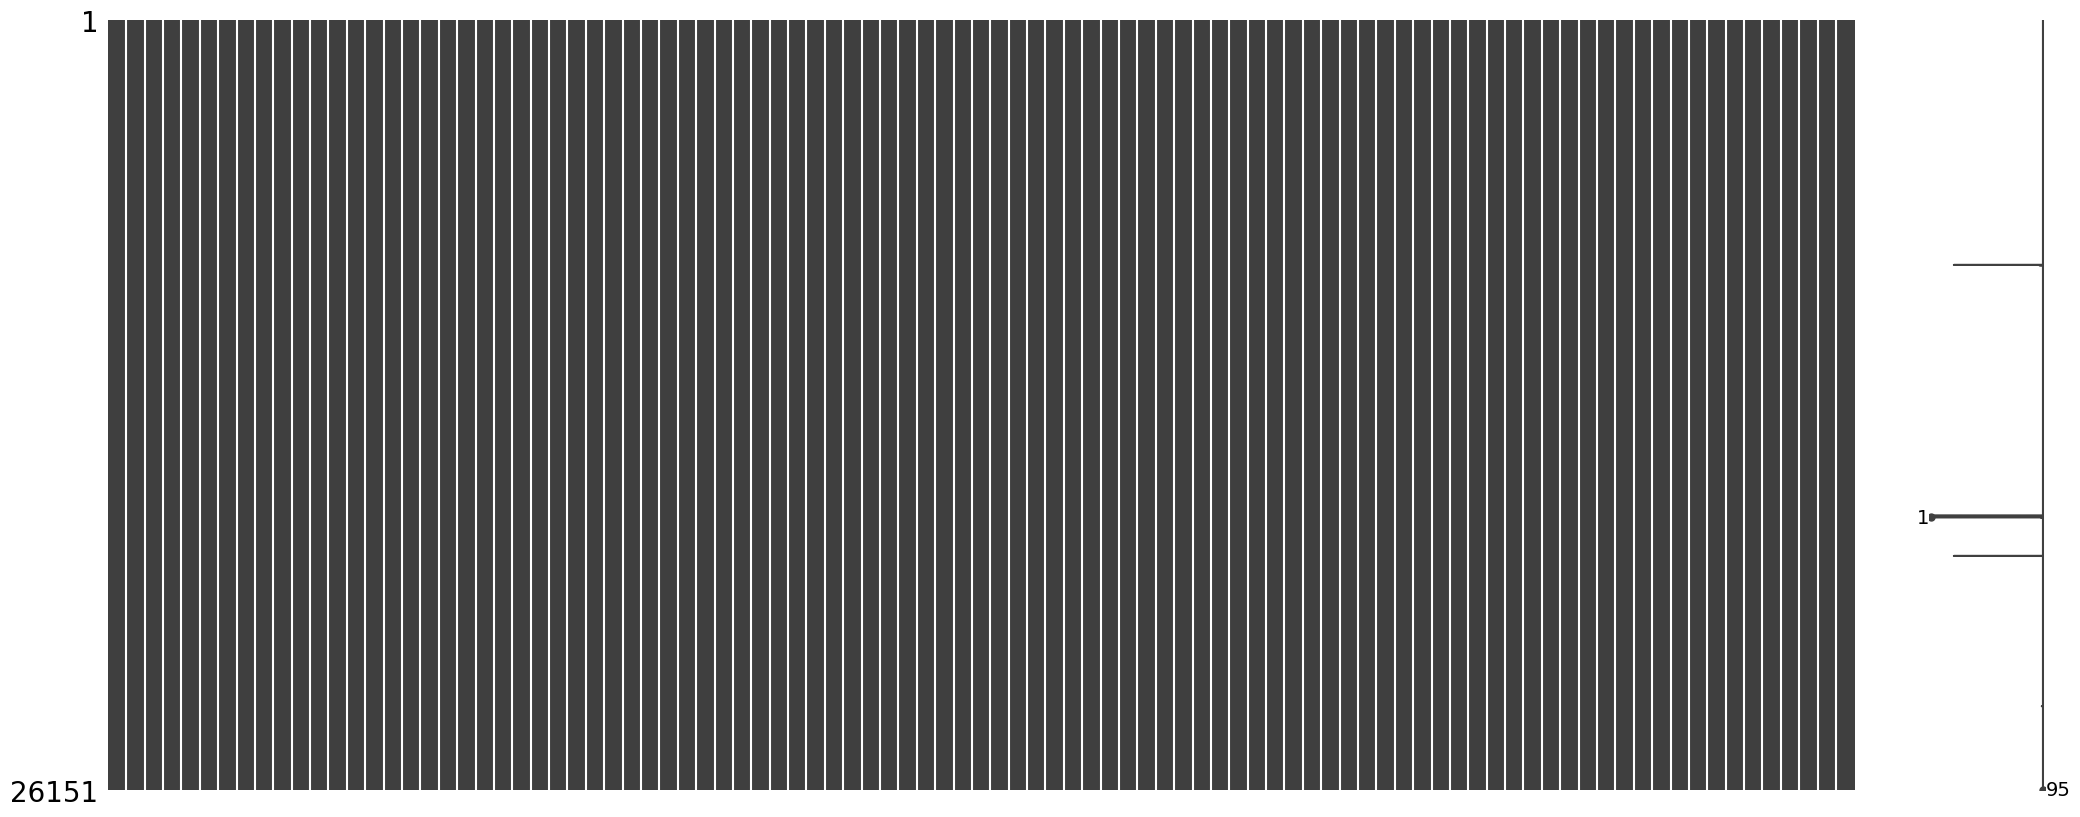

In [30]:
print(data.isna().sum())
msno.matrix(data)